# Overview of the Problem
In order to address this problem, it is necessary to analyze the various factors that may affect a borrower's ability to repay a loan. One approach to this problem is to use a machine learning algorithm called random forest. Random forest is a type of ensemble learning method that involves constructing a large number of decision trees and then combining their predictions to make a final prediction.

In this work, we will be using random forest to predict the risk of a borrower being unable to repay a loan, based on a dataset of loan information. We will begin by exploring the characteristics of the data and identifying any relevant patterns or trends. Next, we will train a random forest model using a portion of the data, and evaluate its performance on the remaining data. Finally, we will use the trained model to make predictions on a new set of loan data, and analyze the results to determine the effectiveness of the model in predicting loan risk.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Data Exploration
Before we can begin building and training a machine learning model, it is necessary to first load and explore our dataset. This is an important step as it allows us to gain a better understanding of the data we are working with and identify any potential issues or biases that may impact our analysis.

Exploring the dataset also helps us to identify any trends or patterns that may be relevant to our prediction task. By examining the characteristics of the data, we can gain insights into which features may be most relevant to our prediction and how they may be correlated with the target variable.

Finally, loading and exploring the dataset allows us to ensure that the data is properly formatted and ready for further analysis. By examining the data, we can ensure that it is clean and consistent, and that there are no missing values or errors that could potentially impact the performance of our model.

In [3]:
loan_data = pd.read_csv("/content/loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
# We check for missing values in the dataset
missing_values = loan_data.isnull().sum()
print(missing_values)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


# Data Visualization


In [7]:
df = loan_data

Text(0.5, 0, 'FICO')

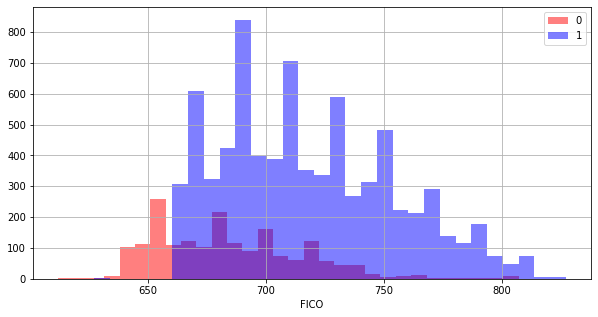

In [26]:
plt.figure(figsize=(10,5))
df[df['credit.policy']==0]['fico'].hist(bins=30, alpha=0.5, color='red', label='0')
df[df['credit.policy']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='1')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 1.0, 'Histogram of FICO scores by not fully paid')

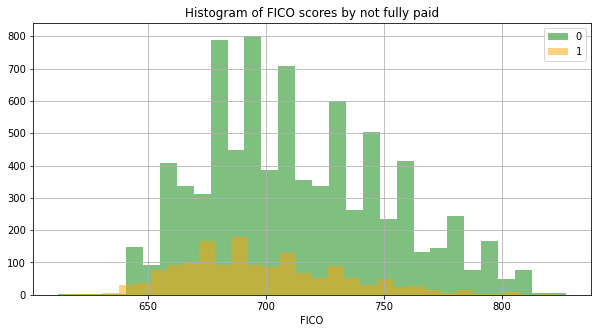

In [29]:
plt.figure(figsize=(10,5))
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='0')
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='orange', label='1')
plt.legend()
plt.xlabel('FICO')
plt.title('Histogram of FICO scores by not fully paid')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

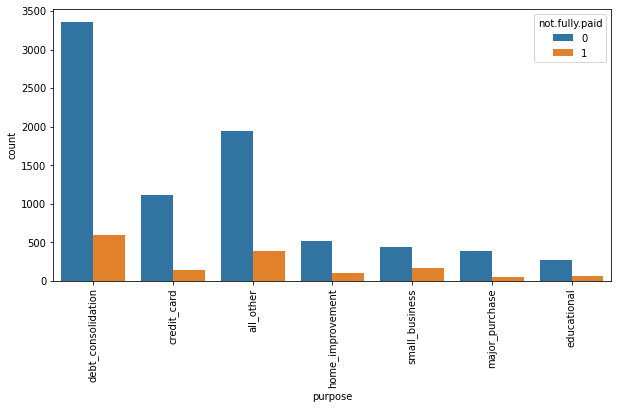

In [30]:
plt.figure(figsize=(10,5))
sns.countplot('purpose', data=df, hue='not.fully.paid')
plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

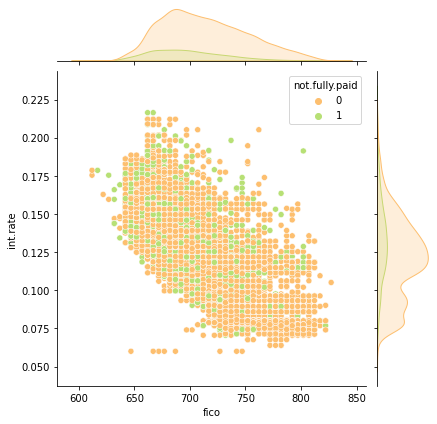

In [31]:
plt.figure(figsize=(10,5))
sns.jointplot('fico', 'int.rate', data=df, hue='not.fully.paid', palette='RdYlGn')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Linear regression plot of FICO and interest rate')

<Figure size 864x432 with 0 Axes>

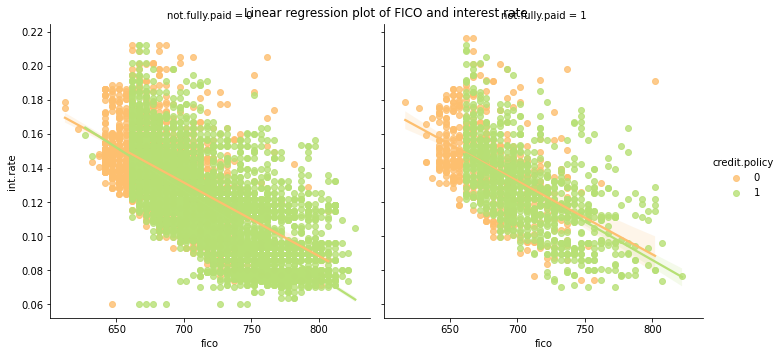

In [32]:
plt.figure(figsize=(12,6))
sns.lmplot('fico', 'int.rate', data=df, col='not.fully.paid', hue='credit.policy', palette='RdYlGn')
plt.suptitle('Linear regression plot of FICO and interest rate')

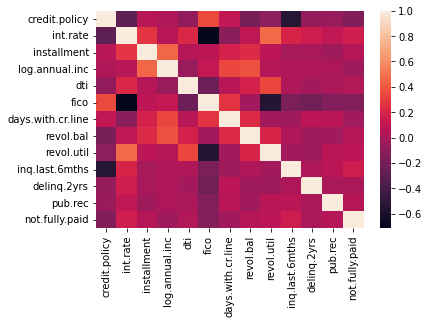

In [13]:
sns.heatmap(df.corr())

# Data Processing

In [14]:
df2=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [15]:
X=df2.drop('not.fully.paid', axis=1)
y=df2['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Decision Tree

In [17]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preds1=dt.predict(X_test)

This code will create a decision tree classifier using the DecisionTreeClassifier class from the sklearn library. The classifier will be trained on the 'X_train' and 'y_train' data using the fit() method.

Once the classifier is trained, it can be used to make predictions on the 'X_test' data using the predict() method. The predictions will be stored in the 'preds1' variable.

A decision tree classifier is a type of machine learning model that makes predictions based on a tree-like structure. The model starts with a root node, and splits the data into different branches based on certain conditions. The splits are made in such a way that the resulting branches contain data that is as pure as possible (i.e., contains data belonging to a single class). The model continues to split the data until it reaches a certain depth or until it can no longer find a split that results in purer data. The final branches of the tree are called leaves, and the predictions are made based on the class of the data in the leaves.

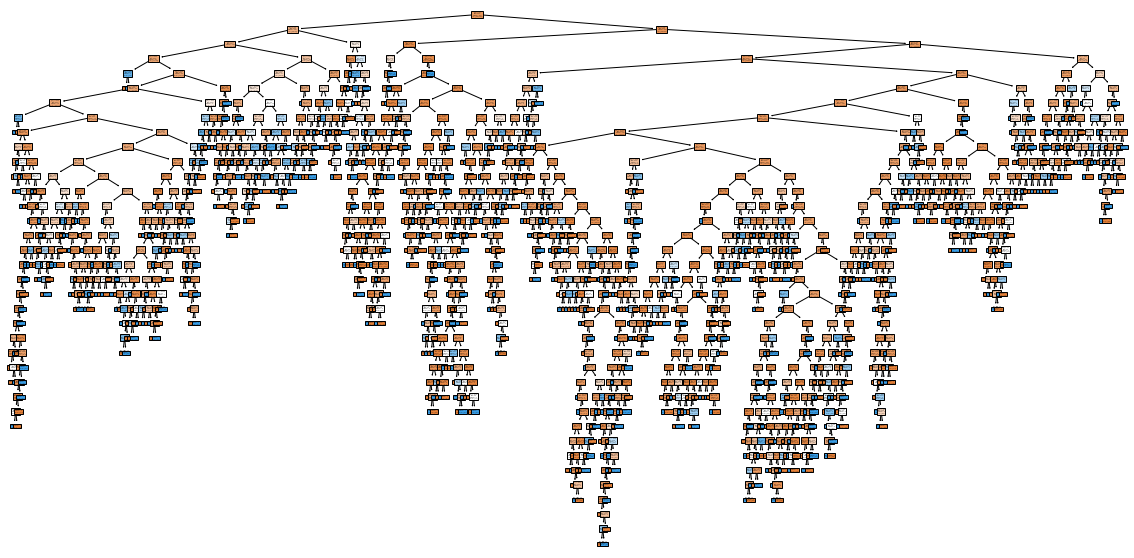

In [33]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()


To understand the decision tree that you trained, you can start by looking at the root node, which is the top node in the tree. The root node represents the entire dataset, and the split that it makes divides the data into two branches.

The splits in the tree are made based on certain conditions that are evaluated on the features of the data. For example, the root node might split the data based on the value of a certain feature, such as whether the value is greater than or equal to a certain threshold. The data in the left branch will contain all the rows where the feature value is less than the threshold, and the data in the right branch will contain all the rows where the feature value is greater than or equal to the threshold.

The tree continues to split the data in this way until it reaches a certain depth or until it can no longer find a split that results in purer data. The final branches of the tree are called leaves, and the predictions are made based on the class of the data in the leaves.

You can use the tree to understand how the model is making its predictions by following the splits in the tree and seeing which branch the data ends up in. You can also use the conditions in the nodes to understand which features the model is using to make the splits.

In [18]:
print(classification_report(y_test,preds1))
print(confusion_matrix(y_test,preds1))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2648
           1       0.20      0.22      0.21       513

    accuracy                           0.73      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.74      0.73      0.74      3161

[[2203  445]
 [ 402  111]]


# Random Forest

In [19]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
preds2=rf.predict(X_test)

In [20]:
print(classification_report(y_test,preds2))
print(confusion_matrix(y_test,preds2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2648
           1       0.39      0.02      0.03       513

    accuracy                           0.84      3161
   macro avg       0.62      0.51      0.47      3161
weighted avg       0.77      0.84      0.77      3161

[[2634   14]
 [ 504    9]]


# Tuning Random Forest Model

In [21]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf1 = RandomForestClassifier()
rf2 = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, 
                              cv = 3, verbose=2,n_jobs = -1)
rf2.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [22]:
rf2.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [23]:
rf3=RandomForestClassifier(n_estimators= 200,
 min_samples_split=2,
 min_samples_leaf=2,
 max_features='auto',
 max_depth=40,
 bootstrap=True)
rf3.fit(X_train,y_train)
preds3=rf3.predict(X_test)

In [24]:
print(classification_report(y_test,preds3))
print(confusion_matrix(y_test,preds3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2648
           1       0.53      0.02      0.03       513

    accuracy                           0.84      3161
   macro avg       0.68      0.51      0.47      3161
weighted avg       0.79      0.84      0.77      3161

[[2640    8]
 [ 504    9]]
